In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"D:\GCOEN\DS ExcelR Assignments\Glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [9]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<Axes: >

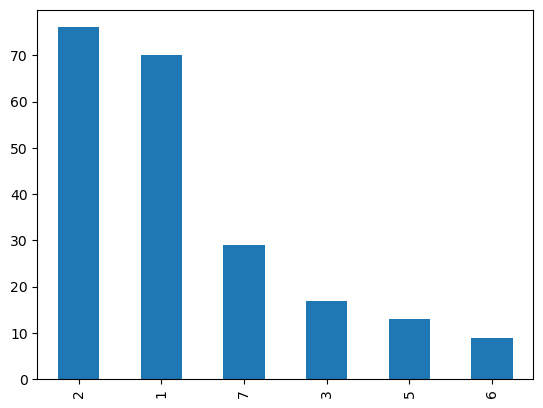

In [10]:
df['Type'].value_counts().plot(kind = 'bar')

In [11]:
df['RI'].mean(), df['RI'].median(), df['RI'].mode()[0]

(1.5183654205607469, 1.51768, 1.5159)

In [12]:
df['RI'].skew(), df['RI'].kurt()

(1.6254305060087644, 4.931737386095595)

<Axes: >

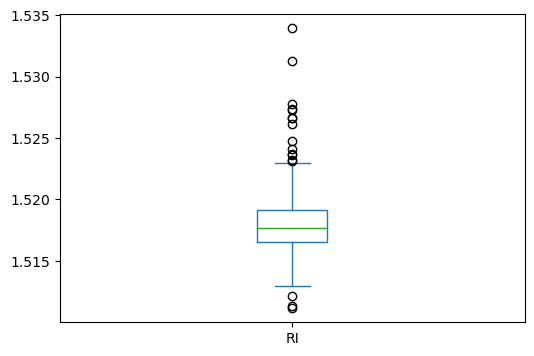

In [13]:
df['RI'].plot(kind = 'box', figsize = (6,4))

In [14]:
Q1 = df['RI'].quantile(0.25)
Q3 = df['RI'].quantile(0.75)
IQR = (Q3 - Q1) / 2
IQR

0.0013174999999999715

In [15]:
Lower_Quartile = Q1 - 1.5*(IQR)
Upper_Quartile = Q3 + 1.5*(IQR)
[Lower_Quartile, Upper_Quartile]

[1.51454625, 1.52113375]

In [16]:
index = df['RI'][(df['RI']>Upper_Quartile)|(df['RI']<Lower_Quartile)].index
df.drop(index, inplace=True)

<Axes: >

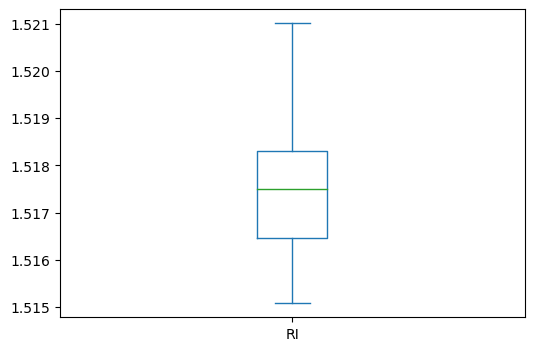

In [17]:
df['RI'].plot(kind = 'box', figsize = (6,4))

<Axes: >

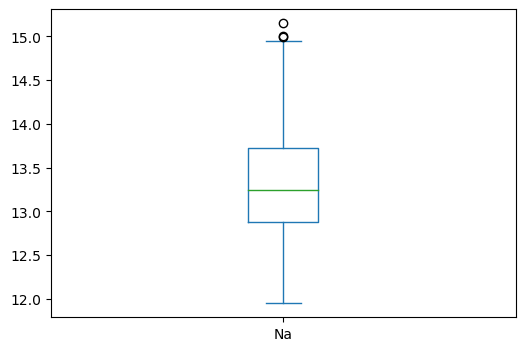

In [18]:
df['Na'].plot(kind = 'box', figsize = (6,4))

In [19]:
Q1 = df['Na'].quantile(0.25)
Q3 = df['Na'].quantile(0.75)
IQR = (Q3 - Q1) / 2
IQR

0.4225000000000003

In [20]:
Lower_Quartile = Q1 - 1.5*(IQR)
Upper_Quartile = Q3 + 1.5*(IQR)
[Lower_Quartile, Upper_Quartile]

[12.241249999999999, 14.353750000000002]

In [21]:
index = df['Na'][(df['Na']>Upper_Quartile)|(df['Na']<Lower_Quartile)].index
df.drop(index, inplace=True)

<Axes: >

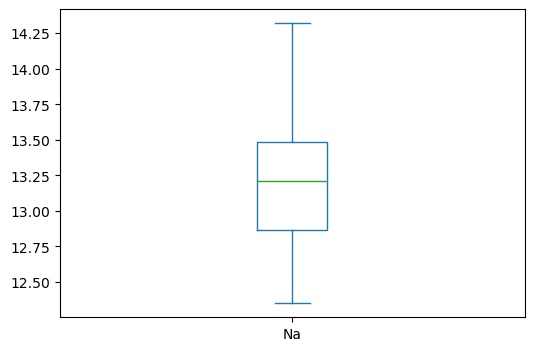

In [22]:
df['Na'].plot(kind = 'box', figsize = (6,4))

<Axes: >

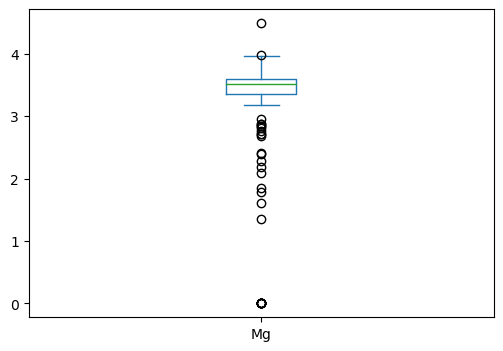

In [23]:
df['Mg'].plot(kind = 'box', figsize = (6,4))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
x = df.drop('Type', axis = 1)
y = df['Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 9), (30, 9), (116,), (30,))

In [25]:
# Bagging
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = rf_model.predict(x_test)
y_pred

array([1, 2, 1, 3, 7, 1, 1, 1, 2, 1, 1, 2, 5, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       3, 6, 7, 3, 7, 2, 1, 1], dtype=int64)

In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [28]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       0.90      0.75      0.82        12
           3       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         3

    accuracy                           0.83        30
   macro avg       0.73      0.76      0.74        30
weighted avg       0.87      0.83      0.85        30



In [29]:
# Confusion matrix
print('Confusion Matrix:')
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[10,  1,  1,  0,  0,  0],
       [ 2,  9,  0,  0,  1,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3]], dtype=int64)

In [30]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [31]:
# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

  Feature  Importance
3      Al    0.181814
2      Mg    0.161849
0      RI    0.158884
6      Ca    0.122965
4      Si    0.117211
1      Na    0.099128
5       K    0.086028
8      Fe    0.046645
7      Ba    0.025475


In [32]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize base model (weak learner)
base_model = DecisionTreeClassifier(max_depth=1)

# Apply AdaBoost with the base model
ada_model = AdaBoostClassifier(base_model, n_estimators=100, random_state=42)
ada_model.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [33]:
y_pred_ada = ada_model.predict(x_test)
y_pred_ada

array([1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1], dtype=int64)

In [34]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'AdaBoost Accuracy: {accuracy_ada:.2f}')
print('AdaBoost Classification Report:')
print(classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.60
AdaBoost Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.75      0.69        12
           2       0.56      0.75      0.64        12
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.60        30
   macro avg       0.24      0.30      0.27        30
weighted avg       0.48      0.60      0.53        30



#### 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging reduces variance by training models independently on different data subsets and aggregating their predictions.
Boosting reduces both bias and variance by training models sequentially, with each new model focusing on correcting the errors of the previous models.
Each technique has its strengths: Bagging is often better when you're concerned about overfitting, while Boosting tends to perform better when you want to maximize accuracy, though it may require more fine-tuning to prevent overfitting.

#### 2. Explain how to handle imbalance in the data.

Handling imbalanced data involves techniques to address the issue where one class significantly outnumbers others, leading to biased model predictions. Common approaches include resampling methods like undersampling (reducing the majority class) and oversampling (increasing the minority class) using techniques like SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class. Alternatively, cost-sensitive learning assigns higher penalties for misclassifying the minority class. You can also adjust class weights in algorithms like decision trees or SVMs to give more importance to the minority class, ensuring the model focuses on both classes equally.